### 신경망 모델
- 이진 분류: 유방암 예측 사례

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- 데이터 준비

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [19]:
cancer_std = StandardScaler().fit_transform(cancer.data)

##### 1. 데이터를 정규/표준화 하지 않은 경우

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

- 모델 정의

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense       # Dense: Fully-connected layer

In [22]:
model = Sequential([
    Dense(100, input_dim=30, activation='relu'),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               3100      
                                                                 
 dense_11 (Dense)            (None, 24)                2424      
                                                                 
 dense_12 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 모델 설정(컴파일)

In [23]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

- 모델 학습

In [24]:
history = model.fit(X_train, y_train,
                    validation_split=0.2,    # 학습중 검증용
                    epochs=100,              # 반복 횟수
                    batch_size=100,           # 한번에 학습할 데이터 수
                    )

Epoch 1/100


4/4 [==============================] - 1s 53ms/step - loss: 53.7200 - accuracy: 0.6401 - val_loss: 40.4455 - val_accuracy: 0.5714
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 18.5284 - accuracy: 0.6401 - val_loss: 3.5655 - val_accuracy: 0.4286
Epoch 3/100
4/4 [==============================] - 0s 11ms/step - loss: 8.7646 - accuracy: 0.3599 - val_loss: 13.5770 - val_accuracy: 0.4286
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 13.3142 - accuracy: 0.3599 - val_loss: 8.7253 - val_accuracy: 0.4286
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 5.3330 - accuracy: 0.4231 - val_loss: 3.5974 - val_accuracy: 0.5714
Epoch 6/100
4/4 [==============================] - 0s 11ms/step - loss: 4.9713 - accuracy: 0.6401 - val_loss: 6.2462 - val_accuracy: 0.5714
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 2.3643 - accuracy: 0.7225 - val_loss: 1.4217 - val_accuracy: 0.5385
Epoch 8/100
4/4 [==========

- 모델 평가

In [25]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9298


[0.20170626044273376, 0.9298245906829834]

- 훈련과정 시각화
    - epoch에 따른 accuracy, val_loss의 변화

In [26]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

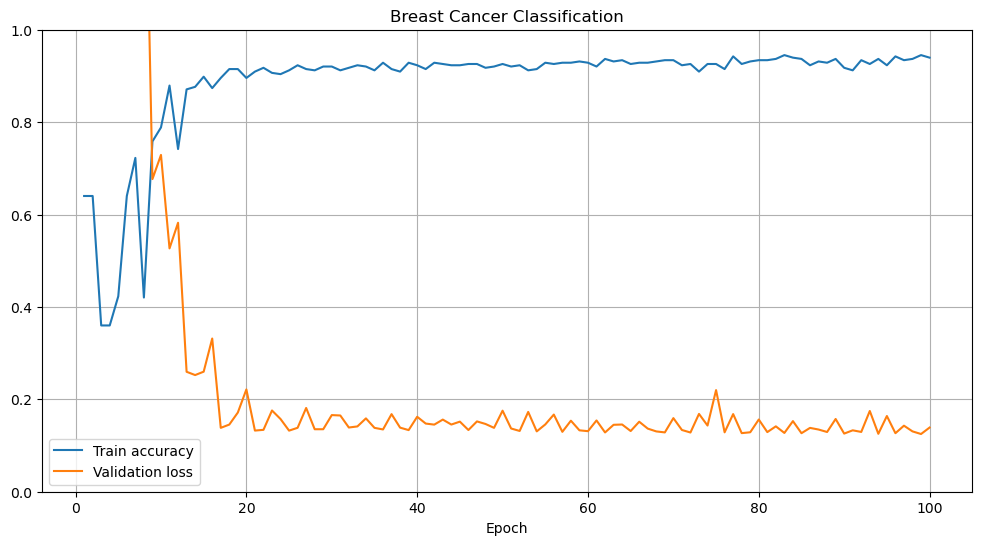

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(xs, y_acc, label='Train accuracy')
plt.plot(xs, y_vloss, label='Validation loss')
plt.legend(), plt.grid()
plt.ylim([0, 1]), plt.xlabel('Epoch')
plt.title('Breast Cancer Classification')
plt.show()


##### 2. 데이터를 표준화한 경우

In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    cancer_std, cancer.target, stratify=cancer.target, test_size=0.2, random_state=2023
)

In [29]:
model2 = Sequential()
model2.add(Dense(100, input_shape=(30,), activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               3100      
                                                                 
 dense_14 (Dense)            (None, 24)                2424      
                                                                 
 dense_15 (Dense)            (None, 1)                 25        
                                                                 
Total params: 5549 (21.68 KB)
Trainable params: 5549 (21.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Model compile
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [31]:
# Model fit
history2 = model2.fit(X_train2, y_train2, validation_split=0.2, epochs=100, batch_size=100, verbose=0)

In [32]:
# Model evaluate
model2.evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 6ms/step - loss: 0.2933 - accuracy: 0.9561


[0.29334554076194763, 0.9561403393745422]

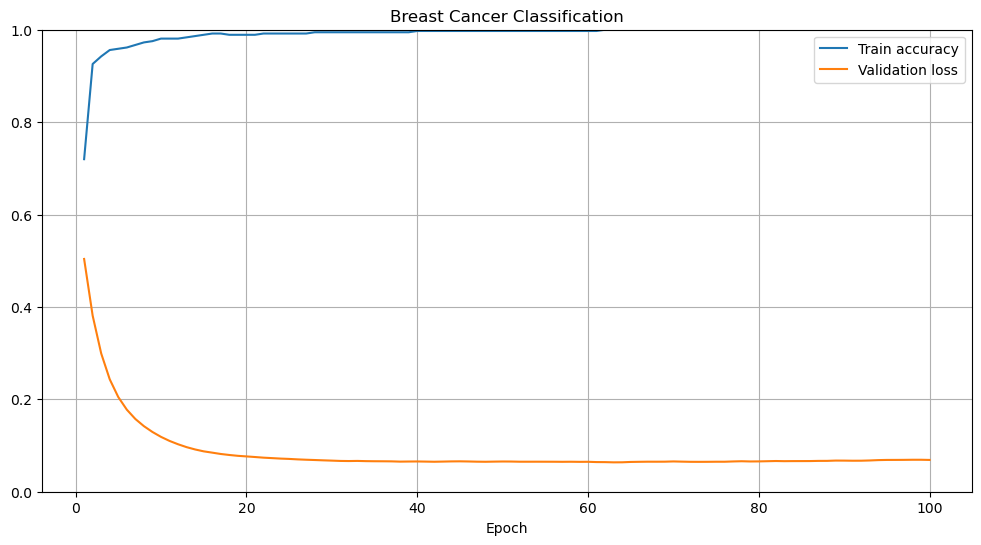

In [33]:
# visualization
y_acc = history2.history['accuracy']
y_vloss = history2.history['val_loss']

xs = np.arange(1, len(y_acc) + 1)

plt.figure(figsize=(12, 6))
plt.plot(xs, y_acc, label='Train accuracy')
plt.plot(xs, y_vloss, label='Validation loss')
plt.legend(), plt.grid()
plt.ylim([0, 1]), plt.xlabel('Epoch')
plt.title('Breast Cancer Classification')
plt.show()